# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

PLEASE NOTE: Once satisfactory dataset (list of cities) was populated, I chose not to restart entire code/notebook's kernal in order to maintain a static list of cities to allow for static regression analysis calculation. Although restarting the kernal and subsequent execution would still allow the main regression analysis discussion points to remain accurate, every new dataset of randomly generated cities would cause very slight changes in specific regression equation variables (slope, y-intercept, rvalue, r-squared value, etc.). As each of these varaible's calculation was referenced down to the decimal for each analysis section, I wanted to ensure readability alignment. Thank you.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 614
['tsiombe', 'badger', 'isafjordur', 'la passe', 'edinburgh of the seven seas', 'albany', 'anadyr', 'waitangi', 'haiku-pauwela', 'port-aux-francais', 'saynshand', "port saint john's", 'ceerigaabo', 'whitehorse', 'ust-nera', 'adamstown', 'sayat', 'grytviken', 'luderitz', 'bredasdorp', 'taiohae', 'olinda', 'eyl', 'ushuaia', 'wailua homesteads', 'arraial do cabo', 'bobrov', 'itoman', 'upington', 'port alfred', 'portland', 'bethel', 'noosa heads', 'port sudan', 'bemidji', 'shevchenko', 'dosso', 'crane', 'karagandy', 'happy valley-goose bay', 'afaahiti', 'pauini', 'vorgashor', 'novodvinsk', 'hithadhoo', 'puerto natales', 'dawei', 'vredendal', 'nova vicosa', 'harstad', 'keflavik', 'praia da vitoria', 'bilibino', 'kalmunai', 'sassandra', 'papatowai', "chul'man", 'uturoa', 'isla del bosque', 'kas', 'felidhoo', 'axim', 'makassar', 'puerto ayora', 'dakhla', 'atbara', 'constantia', 'west island', 'venezuela', 'margaret river', 'georgetown', 'tralee', 'kodiak', 'ti

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [72]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=metric" + "&q="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tsiombe
Processing Record 2 of Set 1 | badger
Processing Record 3 of Set 1 | isafjordur
Processing Record 4 of Set 1 | la passe
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | anadyr
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | haiku-pauwela
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | saynshand
Processing Record 12 of Set 1 | port saint john's
Processing Record 13 of Set 1 | ceerigaabo
Processing Record 14 of Set 1 | whitehorse
Processing Record 15 of Set 1 | ust-nera
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | sayat
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | luderitz
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | taiohae
City not found. Skipping...
Processing Record 

In [109]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [110]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tsiombe,-25.3000,45.4833,17.52,80,0,2.01,MG,1714966424
1,badger,64.8000,-147.5333,14.95,38,100,6.69,US,1714966424
2,isafjordur,66.0755,-23.1240,0.79,80,8,5.08,IS,1714966424
3,la passe,45.5549,-0.8967,12.77,86,44,5.63,FR,1714966424
4,edinburgh of the seven seas,-37.0676,-12.3116,13.74,64,86,14.00,SH,1714966424


In [111]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [112]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tsiombe,-25.3000,45.4833,17.52,80,0,2.01,MG,1714966424
1,badger,64.8000,-147.5333,14.95,38,100,6.69,US,1714966424
2,isafjordur,66.0755,-23.1240,0.79,80,8,5.08,IS,1714966424
3,la passe,45.5549,-0.8967,12.77,86,44,5.63,FR,1714966424
4,edinburgh of the seven seas,-37.0676,-12.3116,13.74,64,86,14.00,SH,1714966424


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

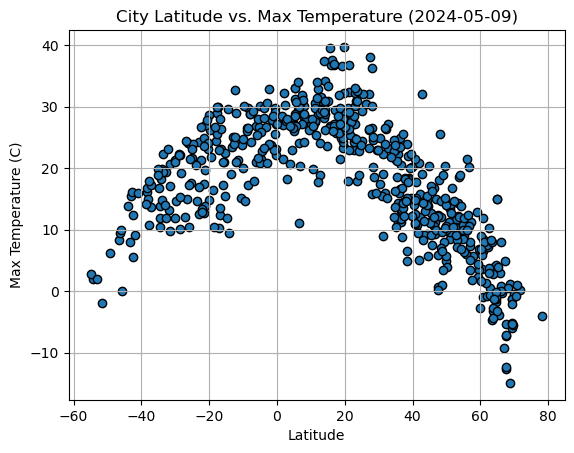

In [127]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2024-05-09)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

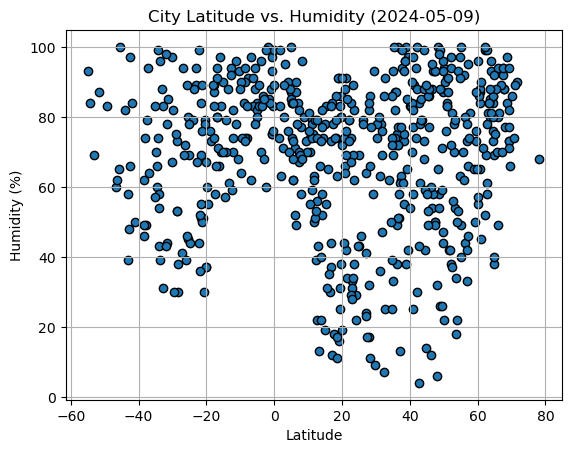

In [128]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2024-05-09)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

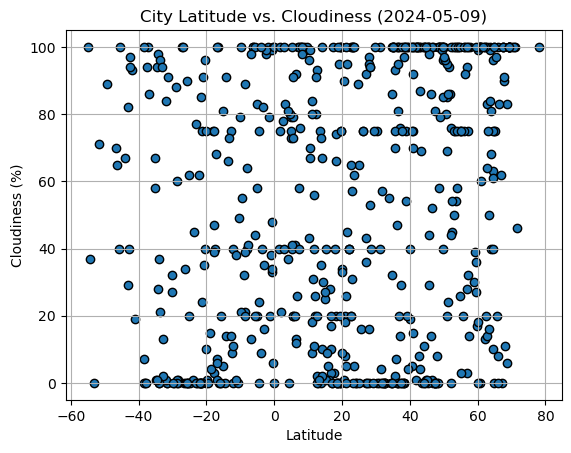

In [129]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2024-05-09)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

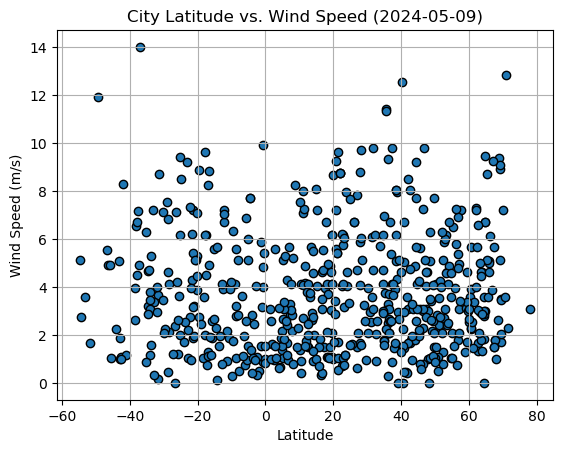

In [130]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2024-05-09)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [182]:
# Define a function to create Linear Regression plots
# Please note: chose not to define function here for linear regression and decided to reiterate/reset equation & regression values for each calculation

In [183]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,badger,64.8000,-147.5333,14.95,38,100,6.69,US,1714966424
2,isafjordur,66.0755,-23.1240,0.79,80,8,5.08,IS,1714966424
3,la passe,45.5549,-0.8967,12.77,86,44,5.63,FR,1714966424
5,albany,42.6001,-73.9662,11.56,84,100,1.67,US,1714966241
6,anadyr,64.7500,177.4833,-1.72,69,0,3.00,RU,1714966425


In [184]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tsiombe,-25.3000,45.4833,17.52,80,0,2.01,MG,1714966424
4,edinburgh of the seven seas,-37.0676,-12.3116,13.74,64,86,14.00,SH,1714966424
7,waitangi,-43.9535,-176.5597,13.79,82,67,2.24,NZ,1714966425
9,port-aux-francais,-49.3500,70.2167,6.15,83,89,11.93,TF,1714966425
11,port saint john's,-31.6229,29.5448,20.65,44,0,3.65,ZA,1714966425


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8706279365221458
The r-squared value is: 0.7579930038528094


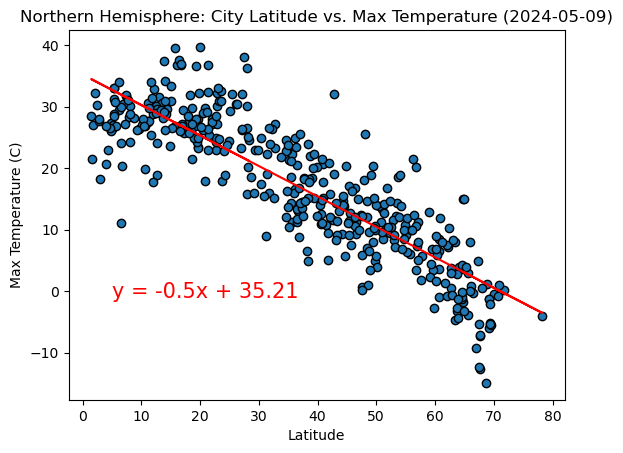

In [199]:
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. max temperature within our Northern Hemisphere dataset
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolors='black')

# Calculate linear regression equation and plot (plot line and annotate equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(slope.round(2)) + "x + " + str(intercept.round(2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_equation, (5,-1), fontsize=15, color='r')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Northern Hemisphere: City Latitude vs. Max Temperature (2024-05-09)")

# Show plot and print r value
print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

The r-value is: 0.7162669042675219
The r-squared value is: 0.5130382781489794


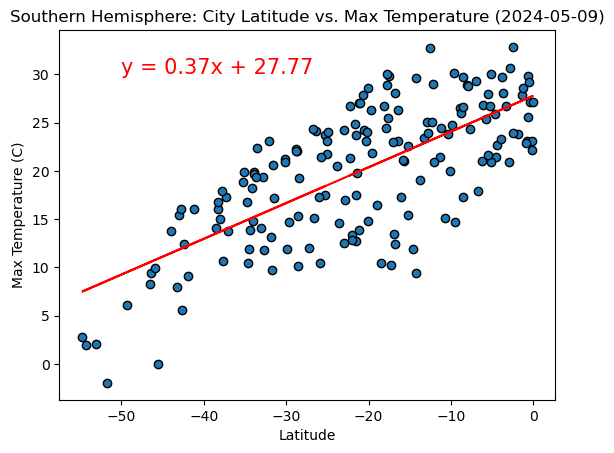

In [200]:
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. max temperature within our Southern Hemisphere dataset
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolors='black')

# Calculate linear regression equation and plot (plot line and annotate equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(slope.round(2)) + "x + " + str(intercept.round(2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_equation, (-50,30), fontsize=15, color='r')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Southern Hemisphere: City Latitude vs. Max Temperature (2024-05-09)")

# Show plot and print r value
print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 

NORTHERN HEMISPHERE: Here we can see our linear regression equation is (y = -0.5x + 35.21). This model has a slope of -0.5 and a y-intercept of 35.21. Visually, we can tell from our scatter plot/regression line that the dataset's two factors (Latitude and Max Temperature (C)) seem to have a strong negative correlation evidenced by the negative slope and general strong proximity of datapoints fitting close to the regression line. This is further evidenced quantitatively by the r-value of (-0.870), which is categorized within the "strong" range for strength of correlation. A "negative" correlation can be interpreted as an "inverse" relationship between factors A and B. As such, this model shows that as Latitude increases (the further away from the Equator for these Northern Hemisphere cities), the corresponding Max Temperature values decrease. Furthermore, the calculated r-squared value or coefficient of determination = (0.758). This means the relationship between Latitude and Max Tempurature explains ~76% of the variation within the dataset. In other words, Latitude accounts for ~76% of the variations in outcome Max Temperature values within our Northern Hemisphere dataset.

SOUTHERN HEMISPHERE: Here we can see our linear regression equation is (y = 0.37x + 27.77). This model has a slope of 0.37 and a y-intercept of 27.77. Visually, we can tell from our scatter plot/regression line that the dataset's two factors (Latitude and Max Temperature (C)) seem to have a strong positive correlation evidenced by the positive slope and general strong proximity of datapoints fitting close to the regression line. This is further evidenced quantitatively by the r-value of (0.716), which is categorized within the "strong" range for strength of correlation. A "positive" correlation can be interpreted as a "direct" relationship between factors A and B. As such, this model shows that as Latitude increases (the closer to the Equator for these Southern Hemisphere cities), the corresponding Max Temperature values increase as well. Furthermore, the calculated r-squared value or coefficient of determination = (0.513). This means the relationship between Latitude and Max Tempurature explains ~51% of the variation within the dataset. In other words, Latitude accounts for ~51% of the variations in outcome Max Temperature values within our Southern Hemisphere dataset.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.151967958769441
The r-squared value is: 0.02309426049255052


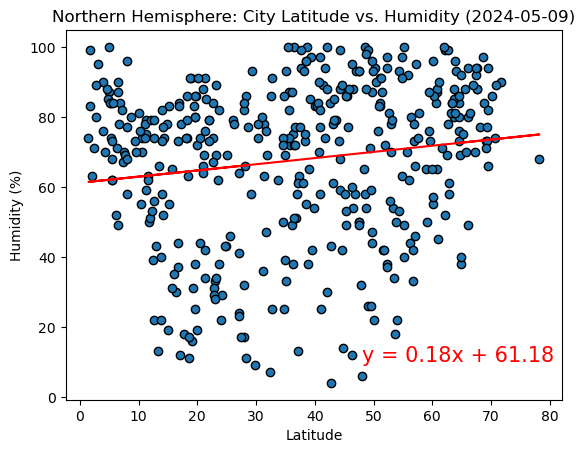

In [198]:
# Northern Hemisphere
# Build scatter plot for latitude vs. humidity within our Northern Hemisphere dataset
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.scatter(x_values, y_values, edgecolors='black')

# Calculate linear regression equation and plot (plot line and annotate equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(slope.round(2)) + "x + " + str(intercept.round(2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_equation, (48,10), fontsize=15, color='r')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere: City Latitude vs. Humidity (2024-05-09)")

# Show plot and print r value
print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

The r-value is: 0.30909715679690825
The r-squared value is: 0.09554105233993249


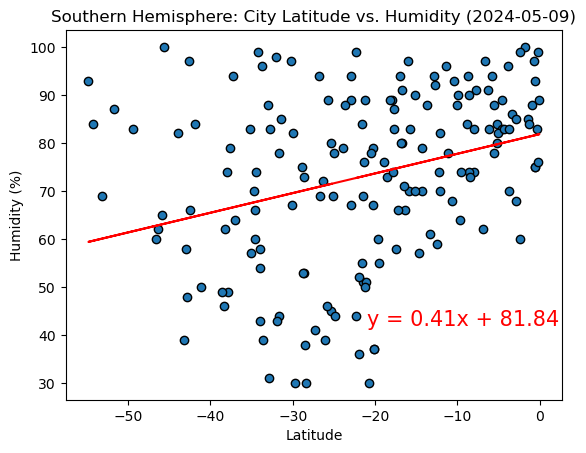

In [201]:
# Southern Hemisphere
# Build scatter plot for latitude vs. humidity within our Southern Hemisphere dataset
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.scatter(x_values, y_values, edgecolors='black')

# Calculate linear regression equation and plot (plot line and annotate equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(slope.round(2)) + "x + " + str(intercept.round(2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_equation, (-21,42), fontsize=15, color='r')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere: City Latitude vs. Humidity (2024-05-09)")

# Show plot and print r value
print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 

NORTHERN HEMISPHERE: Here we can see our linear regression equation is (y = 0.18x + 61.18). This model has a slope of 0.18 and a y-intercept of 61.18. Visually, we can tell from our scatter plot/regression line that the dataset's two factors (Latitude and Humidity (%)) seem to have none or a very weak positive correlation evidenced by the slightly positive slope and general lack of proximity of datapoints fitting close to the regression line. This is further evidenced quantitatively by the r-value of (0.152), which is categorized within the "none or very weak" range for strength of correlation. A "positive" correlation can be interpreted as an "direct" relationship between factors A and B. In general, while we can loosely say that as Latitude increases (the further away from the Equator for these Northern Hemisphere cities), the corresponding Humidity values increase, the very weak correlation doesn't provide much confidence at all. Furthermore, the calculated r-squared value or coefficient of determination = (0.023). This means the relationship between Latitude and Humidity explains only a miniscule ~2% of the variation within the dataset and the remaining ~98% is accounted for by other factors. In other words, Latitude only accounts for ~2% of the variations in outcome Humidity values within our Northern Hemisphere dataset.

SOUTHERN HEMISPHERE: Here we can see our linear regression equation is (y = 0.41x + 81.84). This model has a slope of 0.41 and a y-intercept of 81.84. Visually, we can tell from our scatter plot/regression line that the dataset's two factors (Latitude and Humidity (%)) seem to have a very weak positive correlation evidenced by the slightly positive slope and general lack of proximity of datapoints fitting close to the regression line. This is further evidenced quantitatively by the r-value of (0.309), which is categorized within the "weak" range for strength of correlation. A "positive" correlation can be interpreted as a "direct" relationship between factors A and B. In general, while we can loosely say that as Latitude increases (the closer to the Equator for these Southern Hemisphere cities), the corresponding Humidity values increase, the weak correlation doesn't provide much confidence. Furthermore, the calculated r-squared value or coefficient of determination = (0.095). This means the relationship between Latitude and Humidity explains only a miniscule ~9% of the variation within the dataset and the remaining ~91% is accounted for by other factors. In other words, Latitude only accounts for ~9% of the variations in outcome Humidity values within our Southern Hemisphere dataset.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.19270299195762702
The r-squared value is: 0.03713444310942127


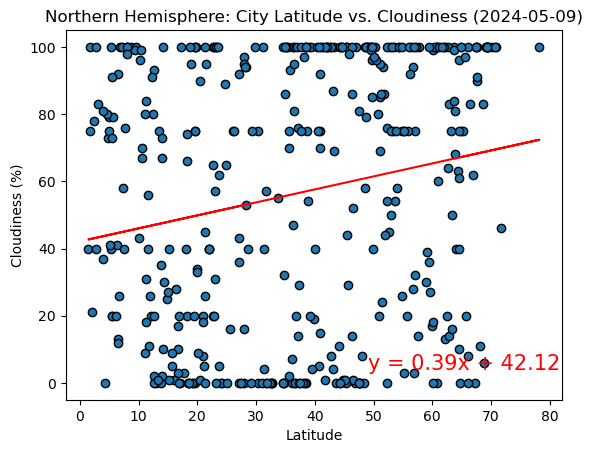

In [207]:
# Northern Hemisphere
# Build scatter plot for latitude vs. cloudiness within our Northern Hemisphere dataset
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors='black')

# Calculate linear regression equation and plot (plot line and annotate equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(slope.round(2)) + "x + " + str(intercept.round(2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_equation, (49,4), fontsize=15, color='r')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere: City Latitude vs. Cloudiness (2024-05-09)")

# Show plot and print r value
print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

The r-value is: 0.001504901852448183
The r-squared value is: 2.2647295855019726e-06


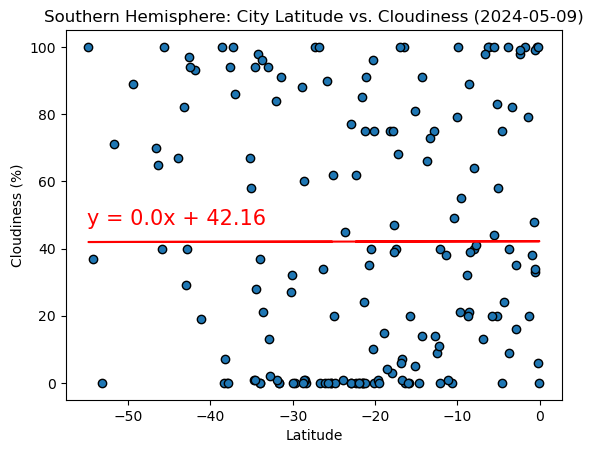

In [213]:
# Southern Hemisphere
# Build scatter plot for latitude vs. cloudiness within our Southern Hemisphere dataset
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors='black')

# Calculate linear regression equation and plot (plot line and annotate equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(slope.round(2)) + "x + " + str(intercept.round(2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_equation, (-55,47), fontsize=15, color='r')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere: City Latitude vs. Cloudiness (2024-05-09)")

# Show plot and print r value
print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:**

NORTHERN HEMISPHERE: Here we can see our linear regression equation is (y = 0.39x + 42.12). This model has a slope of 0.39 and a y-intercept of 42.12. Visually, we can tell from our scatter plot/regression line that the dataset's two factors (Latitude and Cloudiness (%)) seem to have none or a very weak positive correlation evidenced by the slightly positive slope and general lack of proximity of datapoints fitting close to the regression line. This is further evidenced quantitatively by the r-value of (0.192), which is categorized within the "none or very weak" range for strength of correlation. A "positive" correlation can be interpreted as an "direct" relationship between factors A and B. In general, while we can very loosely say that as Latitude increases (the further away from the Equator for these Northern Hemisphere cities), the corresponding Cloudiness values increase, the very weak correlation doesn't provide much confidence at all. Furthermore, the calculated r-squared value or coefficient of determination = (0.037). This means the relationship between Latitude and Cloudiness explains only a miniscule ~3% of the variation within the dataset and the remaining ~97% is accounted for by other factors. In other words, Latitude only accounts for ~3% of the variations in outcome Cloudiness values within our Northern Hemisphere dataset.

SOUTHERN HEMISPHERE: Here we can see our linear regression equation is (y = 0.0x + 42.16). This model has a slope of 0.0 and a y-intercept of 42.16. Visually, we can tell from our scatter plot/regression line that the dataset's two factors (Latitude and Cloudiness (%)) seem to have essentially no correlation evidenced by the lack of slope and general lack of proximity of datapoints fitting close to the regression line. This is further evidenced quantitatively by the r-value of (0.001), which is categorized within the "none or very weak" range for strength of correlation. In general, this model shows we cannot effectively make prediction statements/calculations based Latitude and Cloudiness for these Southern Hemisphere cities. The glaring lack of correlation proves these variables don't seem to influence eachother. Furthermore, the calculated r-squared value or coefficient of determination = (0.00000226). This means the relationship between Latitude and Cloudiness explains only a non-existent ~0.000226% of the variation within the dataset and the remaining ~99.999774% is accounted for by other factors. In other words, Latitude only accounts for ~0.000226% of the variations in outcome Cloudiness values within our Southern Hemisphere dataset.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0940564350284498
The r-squared value is: 0.008846612970261


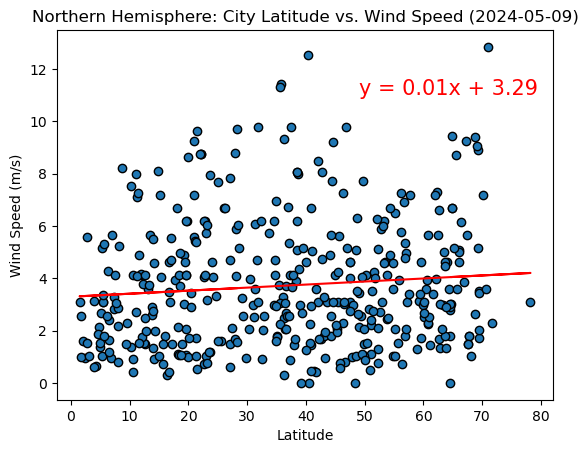

In [215]:
# Northern Hemisphere
# Build scatter plot for latitude vs. wind speed within our Northern Hemisphere dataset
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors='black')

# Calculate linear regression equation and plot (plot line and annotate equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(slope.round(2)) + "x + " + str(intercept.round(2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_equation, (49,11), fontsize=15, color='r')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Northern Hemisphere: City Latitude vs. Wind Speed (2024-05-09)")

# Show plot and print r value
print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

The r-value is: -0.14543774984719993
The r-squared value is: 0.0211521390806167


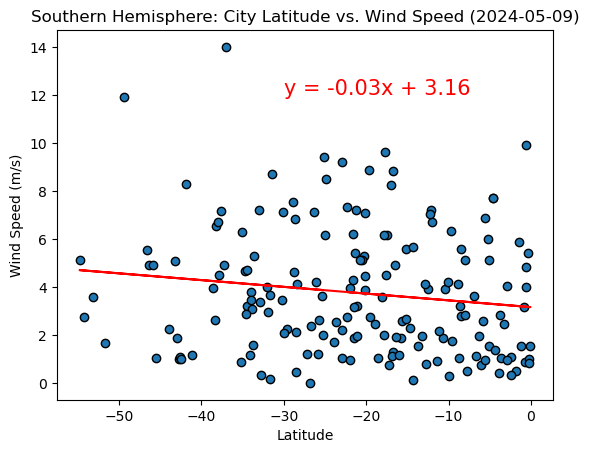

In [217]:
# Southern Hemisphere
# Build scatter plot for latitude vs. wind speed within our Southern Hemisphere dataset
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors='black')

# Calculate linear regression equation and plot (plot line and annotate equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(slope.round(2)) + "x + " + str(intercept.round(2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_equation, (-30,12), fontsize=15, color='r')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Southern Hemisphere: City Latitude vs. Wind Speed (2024-05-09)")

# Show plot and print r value
print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 

NORTHERN HEMISPHERE: Here we can see our linear regression equation is (y = 0.01x + 3.29). This model has a slope of 0.01 and a y-intercept of 3.29. Visually, we can tell from our scatter plot/regression line that the dataset's two factors (Latitude and Wind Speed (m/s)) seem to have none or a very weak positive correlation evidenced by the slightly positive slope and general lack of proximity of datapoints fitting close to the regression line. This is further evidenced quantitatively by the r-value of (0.094), which is categorized within the "none or very weak" range for strength of correlation. A "positive" correlation can be interpreted as an "direct" relationship between factors A and B. In general, while we can very loosely say that as Latitude increases (the further away from the Equator for these Northern Hemisphere cities), the corresponding Wind Speed values increase, the very weak correlation doesn't provide much confidence at all. Furthermore, the calculated r-squared value or coefficient of determination = (0.008). This means the relationship between Latitude and Wind Speed explains only a miniscule ~0.8% of the variation within the dataset and the remaining ~99.2% is accounted for by other factors. In other words, Latitude only accounts for ~0.8% of the variations in outcome Wind Speed values within our Northern Hemisphere dataset.

SOUTHERN HEMISPHERE: Here we can see our linear regression equation is (y = -0.03x + 3.16). This model has a slope of -0.03 and a y-intercept of 3.16. Visually, we can tell from our scatter plot/regression line that the dataset's two factors (Latitude and Wind Speed (m/s)) seem to have none or a very weak negative correlation evidenced by the very slightly negative slope and general lack of proximity of datapoints fitting close to the regression line. This is further evidenced quantitatively by the r-value of (-0.145), which is categorized within the "none or very weak" range for strength of correlation. A "negative" correlation can be interpreted as an "inverse" relationship between factors A and B. In general, while we can very loosely say that as Latitude increases (the closer to the Equator for these Southern Hemisphere cities), the corresponding Wind Speed values increase, the very weak correlation doesn't provide much confidence at all. Furthermore, the calculated r-squared value or coefficient of determination = (0.021). This means the relationship between Latitude and Wind Speed explains only a miniscule ~2% of the variation within the dataset and the remaining ~98% is accounted for by other factors. In other words, Latitude only accounts for ~2% of the variations in outcome Wind Speed values within our Southern Hemisphere dataset.